In [1]:
# import shelve

# filename = "/tmp/shelve.out"
# my_shelf = shelve.open(filename)
# for key in my_shelf:
#     globals()[key]=my_shelf[key]
# my_shelf.close()

In [2]:
# # Linear scaling to [-2^n, 2^n]
# a, b = -11, 77
# target_bit_width = 18

# range_size = b - a
# b_prime = np.floor(a + range_size / 2)
# a_prime = np.floor(2**(target_bit_width-1) / (max((a-b_prime), (b-b_prime)) / 2))

# print(np.log2(np.abs((a-b_prime)*a_prime)), np.log2(np.abs((b-b_prime)*a_prime)))

In [3]:
# Integer.that_can_represent([a-b_prime, b-b_prime]).bit_width

In [4]:
# OLD STUFF
# %reset
# # Imports
# from concrete.fhe import round_bit_pattern, truncate_bit_pattern
# import numpy as np
# from concrete.fhe.dtypes import Integer
# import matplotlib.pyplot as plt

# def linear_up_scaling(x: np.ndarray, a=1, b=0):
#     assert x.dtype == np.int64
#     assert isinstance(a, (int, np.int64)), f"{a=}, {type(a)=}"
#     assert isinstance(b, (int, np.int64)), f"{b=}, {type(b)=}"
#     return (x * a) + b
    
# def linear_down_scaling(x:np.ndarray, a=1, b=0):
#     return (x.astype(np.float64) - float(b)) / float(a)

# # Hypothesis:
# # * all steps are the same size
# # * they aren't too many of them?

# # Some parameters
# # We could do a linear/binary search on the n-round-bits to use

    
# # Function thresholds
# step_size = 7  # Constant step size assumption
# th1 = 21
# th2 = th1 + step_size
# th3 = th2 + step_size

# # Bounds
# a, b = -11, 79

# rounding_threshold = int(np.ceil(np.log2((b-a)/step_size)))

# print("MINIMUM n-round:", rounding_threshold)
# print("##################################")
# print(f"ROUNDING TO: {rounding_threshold}")
# print("##################################")

# # Step size function to optimize
# def f(x, thresholds=(th1, th2, th3)):
#     res = np.zeros_like(x)
#     for threshold in thresholds:
#         res += (x >= threshold).astype(np.int64)
#     return res

# # Inputs
# x = np.arange(a, b, 1)  # Inputs
# x_acc_size = Integer.that_can_represent(x).bit_width
# print("acc size", x_acc_size)

# # Naive rounding
# lsbs = x_acc_size - rounding_threshold
# x_rounded = truncate_bit_pattern(x, lsbs)

# # Compute baseline
# y = f(x)
# y_rounded = f(x_rounded)

# y_bit_width = Integer.that_can_represent(y).bit_width
# print("tlu output bit width", y_bit_width)
# # Plot baseline
# fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

# ax = axes[0]
# ax.step(x, y)
# ax.step(x, y_rounded, linestyle="dashed")
# delta_y = y.max() - y.min()
# epsilon_y = 0.01 * delta_y
# ax.vlines(
#     x[np.concatenate([np.diff(x_rounded).astype(bool), [False]])],
#     y.min()-epsilon_y, y.max()+epsilon_y, color="grey", linestyle="dashed", alpha=.5
# )

# new_b = th1 + ((b - th1) // step_size ) * step_size + bool(b % step_size)*step_size
# new_a = th1 - ((th1 - a) // step_size ) * step_size - bool(a % step_size)*step_size

# # Find a first
# jump_a = np.diff(y) > 0
# jump_index_a = np.arange(0, len(jump_a))[jump_a]  # Compute where jumps are
# print("jump index a", jump_index_a)
# step_size_a = np.diff(jump_index_a)
# assert (step_size_a == step_size).all()
# print("step size a", step_size_a)
# # I need random value to be such that a_prime >> 0

# some_value = rounding_threshold
# print(f"{some_value}=")
# a_prime = np.rint((2**some_value)/(step_size_a.min())).astype(np.int64)
# x_a = linear_up_scaling(x, a=a_prime)
# acc_a = Integer.that_can_represent(x_a).bit_width
# print("acc size a", acc_a)
# lsbs_a = acc_a - rounding_threshold
# print(f"{lsbs_a=}")
# x_a_rounded = linear_down_scaling(truncate_bit_pattern(x_a, lsbs_a).astype(np.float64), a=float(a_prime))
# y_a_rounded = f(x_a_rounded)

# # Plot
# ax = axes[1]
# ax.step(x, y)
# ax.step(x, y_a_rounded, linestyle="dashed")
# ax.vlines(
#     x[np.concatenate([np.diff(x_a_rounded).astype(bool), [False]])], 
#     y.min()-epsilon_y, y.max()+epsilon_y, color="grey", linestyle="dashed", alpha=.5)

# jump_b = np.diff(y_a_rounded)
# steps_index_b = np.arange(0, len(jump_b))[jump_b.astype(bool)]
# steps_size_b = np.diff(steps_index_b)
# diffs = (x_a_rounded - x_a[np.diff(y_a_rounded).argmax()])
# b_prime = diffs[np.abs(diffs).argmin()].astype(np.int64)

# print(f"{a_prime=}, {b_prime=}")


# x_a_b = linear_up_scaling(x, a=a_prime, b=b_prime)
# acc_a_b = Integer.that_can_represent(x_a_b).bit_width
# print("acc size a b", acc_a_b)
# lsbs_a_b = acc_a_b - rounding_threshold
# print(f"{lsbs_a_b=}")
# x_a_b_rounded = linear_down_scaling(
#     truncate_bit_pattern(x_a_b, lsbs_a_b).astype(np.float64), b=float(b_prime), a=float(a_prime))
# print("rounded values a b", np.diff(x[np.concatenate([np.diff(x_a_b_rounded).astype(bool), [False]])]))
# y_calib_rounded = f(x_a_b_rounded)

# # Plot
# ax = axes[2]
# ax.step(x, y)
# ax.step(x, y_calib_rounded, linestyle="dashed")
# ax.vlines(x[np.concatenate([np.diff(x_a_b_rounded).astype(bool), [False]])], y.min()-epsilon_y, y.max()+epsilon_y, color="grey", linestyle="dashed", alpha=.5)

# plt.show()
# plt.close(fig)

In [5]:
# new_b = th1 + ((b - th1) // step_size ) * step_size + bool(b % step_size)*step_size
# new_a = th1 - ((th1 - a) // step_size ) * step_size - bool(a % step_size)*step_size
# new_a, a, b, new_b

In [6]:
# find c, d s.t. new_a * c + d = - 2^(n-1) and new_b * c + d = 2^(n-1) - 1

In [7]:
# n = 20
# coef = ((2**n) - 1)/(new_b - new_a)
# intercept = -2**(n-1) - (new_a * ((2**n - 1)/(new_b - new_a)))

In [8]:
# np.log2(np.abs(new_a * coef + intercept)), np.log2(np.abs(new_b * coef + intercept))

In [9]:
# from concrete.fhe import truncate_bit_pattern
# truncate_bit_pattern(list(range(8)), lsbs_to_remove=1)

# MAGIC HERE

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


MINIMUM n-bits-rounding: 4
acc size 8
TLU output bit width 2
-21 133
n_parts=11.0, n_round=4
3 2
DEBUG:  4.0
x_delta_min-middle=-112.0, x_delta_max-middle=112.0
x_delta_min=-63, x_delta_max=161
a_prime=37449, b_prime=49.0
a_prime=37449, b_prime=49
acc size a b 23
lsbs_a_b=19
rounded values a b [14 14 14 14 15 14 14 14 14]
All values are exactly equal!


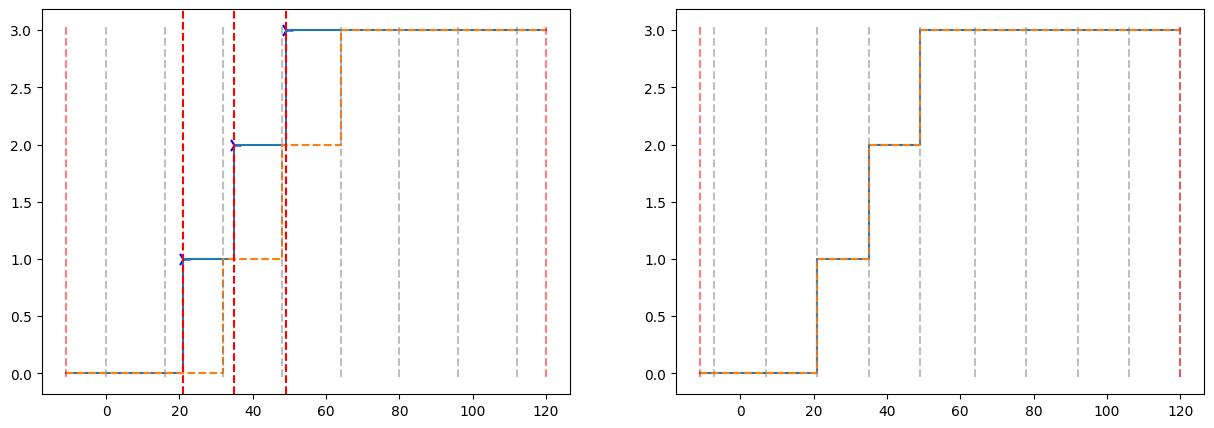

MINIMUM n-bits-rounding: 4
acc size 8
TLU output bit width 2
-21 133
n_parts=11.0, n_round=4
3 2
DEBUG:  4.0
x_delta_min-middle=-112.0, x_delta_max-middle=112.0
x_delta_min=-63, x_delta_max=161
a_prime=37449, b_prime=56.0
a_prime=37449, b_prime=56
acc size a b 23
lsbs_a_b=19
rounded values a b [14 14 14 14 15 14 14 14 14]
All values are exactly equal!


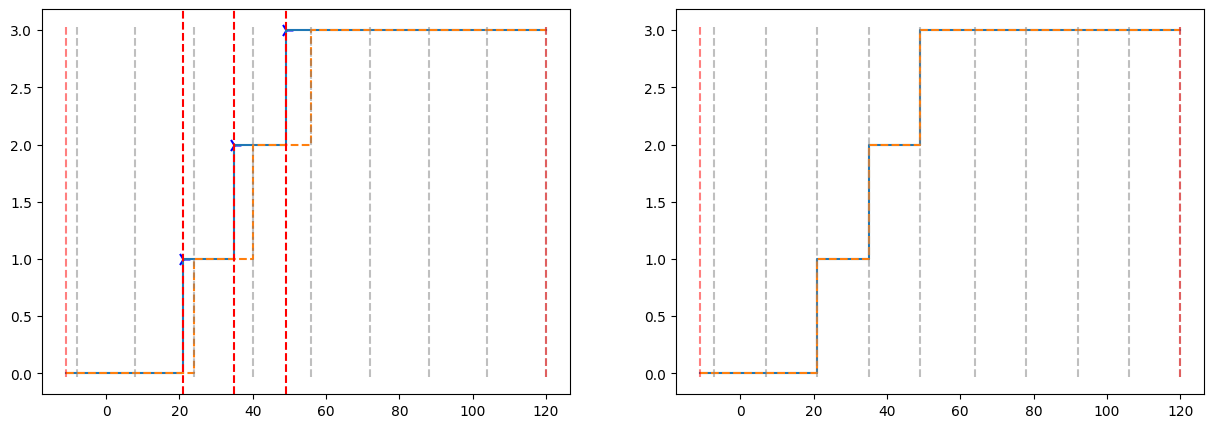

In [36]:
%reset
# Imports
from concrete.fhe import round_bit_pattern, truncate_bit_pattern
import numpy as np
from concrete.fhe.dtypes import Integer
import matplotlib.pyplot as plt

mult_first = False
if mult_first:    
    def linear_up_scaling(x: np.ndarray, a=1, b=0):
        assert x.dtype == np.int64
        assert isinstance(a, (int, np.int64)), f"{a=}, {type(a)=}"
        assert isinstance(b, (int, np.int64)), f"{b=}, {type(b)=}"
        return (x * a) + b
        
    def linear_down_scaling(x:np.ndarray, a=1, b=0):
        return (x.astype(np.float64) - float(b)) / float(a)
else:
    def linear_up_scaling(x: np.ndarray, a=1, b=0):
        assert x.dtype == np.int64
        assert isinstance(a, (int, np.int64)), f"{a=}, {type(a)=}"
        assert isinstance(b, (int, np.int64)), f"{b=}, {type(b)=}"
        return (x - b) * a
        
    def linear_down_scaling(x:np.ndarray, a=1, b=0):
        return (x.astype(np.float64) / float(a)) + float(b)

# Hypothesis:
# * all steps are the same size
# * they aren't too many of them

# Some parameters
# We could do a linear/binary search on the n-round-bits to use

# Function thresholds
step_size = 14  # Constant step size assumption
th1 = 21  # First threshold
th2 = th1 + step_size
th3 = th2 + step_size

thresholds = (th1, th2, th3)
# Function definition bounds
a, b = -11, 120

# Step size function to optimize
def f(x, thresholds=thresholds):
    res = np.zeros_like(x)
    for threshold in thresholds:
        res += (x >= threshold).astype(np.int64)
    return res

for rounding_function in [truncate_bit_pattern, round_bit_pattern]:
    # Comparison figure
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    
    # Minimum n-bits required
    rounding_threshold = int(np.ceil(np.log2((b-a)/step_size)))
    
    print("MINIMUM n-bits-rounding:", rounding_threshold)
    
    # Inputs
    x = np.arange(a, b+1, 1)  # Inputs
    x_acc_size = Integer.that_can_represent(x).bit_width
    print("acc size", x_acc_size)
    
    # Naive rounding baseline
    lsbs = x_acc_size - rounding_threshold
    x_rounded = rounding_function(x, lsbs)
    y = f(x)
    y_rounded = f(x_rounded)
    y_bit_width = Integer.that_can_represent(y).bit_width
    print("TLU output bit width", y_bit_width)
    
    # Plot baseline
    ax = axes[0]
    ax.step(x, y, where="post")
    ax.step(x, y_rounded, linestyle="dashed", where="post")
    # Add brackets to indicate inclusion

    delta_y = y.max() - y.min()
    epsilon_y = 0.01 * delta_y
    ax.vlines(
        x[np.concatenate([[False], np.diff(x_rounded).astype(bool),])],
        y.min()-epsilon_y, y.max()+epsilon_y, color="grey", linestyle="dashed", alpha=.5
    )
    ax.vlines(
        [a, b],
        y.min()-epsilon_y, y.max()+epsilon_y, color="red", linestyle="dashed", alpha=.5, label="data bounds",
    )
    # Mark where the threshold is
    for threshold in thresholds:
        ax.axvline(x=threshold, color='r', linestyle='--')
    
    # Add markers to indicate inclusion only on step changes
    for i in range(1, len(x)):
        if y[i] != y[i-1]:
            ax.scatter(x[i], y[i], marker="4", color='b', s=100)     

    # Find optimal a and b
    delta = step_size

    # Find new limits such that we have smallest bounds that include actual bounds as t_0 + (k * step_size)
    x_delta_min = th1 - ((th1 - a) // step_size ) * step_size - bool(a % step_size)*step_size
    x_delta_max = th1 + ((b - th1) // step_size ) * step_size + bool(b % step_size)*step_size

    print(x_delta_min, x_delta_max)
    
    # Number of elements in the new range for the given step size
    n_parts = ((x_delta_max - x_delta_min) / delta)
    n_round = np.ceil(np.log2(n_parts)).astype(np.int64)
    assert n_round <= rounding_threshold, f"{n_round=} > {rounding_threshold=}"
    print(f"{n_parts=}, {n_round=}")
    
    exceed = ((2**n_round)) - n_parts
    left_bound_add = np.ceil(exceed/2).astype(np.int64)
    right_bound_add = np.floor(exceed/2).astype(np.int64)
    assert left_bound_add + right_bound_add == exceed
    print(left_bound_add, right_bound_add)

    x_delta_min -= left_bound_add * step_size
    x_delta_max += right_bound_add * step_size
    print("DEBUG: ", np.log2(((x_delta_max - x_delta_min) / step_size)))

    middle = (x_delta_max - x_delta_min)/2
    middle = np.median(np.arange(x_delta_min, x_delta_max+1, step_size))
    print(f"{x_delta_min-middle=}, {x_delta_max-middle=}")
    print(f"{x_delta_min=}, {x_delta_max=}")

    # Find the proper n
    if mult_first:
        # n = x_acc_size+1
        n = 23
        a_prime = ((2**n) - step_size)/(x_delta_max - x_delta_min)

        b_prime = -2**(n-1) - (x_delta_min * ((2**n - 1)/(x_delta_max - x_delta_min)))
        
        print(f"{a_prime=}, {b_prime=}")
        
        a_prime = np.floor(a_prime).astype(np.int64)
        b_prime = np.floor(b_prime).astype(np.int64)
    else:
        #n = x_acc_size+1
        n = 23
        a_prime = (2**n - 1) / (x_delta_max - x_delta_min)
        a_prime = np.floor(a_prime).astype(np.int64)

        # b_prime = (2**(n-1)) + (x_delta_min * a_prime)
        b_prime = middle
        if rounding_function == round_bit_pattern:
            b_prime += (delta/2)
        else:
            b_prime += 0
        print(f"{a_prime=}, {b_prime=}")

        a_prime = np.floor(a_prime).astype(np.int64)
        b_prime = np.floor(b_prime).astype(np.int64)

    print(f"{a_prime=}, {b_prime=}")
    
    # Evaluation with calibrated values
    x_a_b = linear_up_scaling(x, a=a_prime, b=b_prime)
    acc_a_b = Integer.that_can_represent(x_a_b).bit_width
    print("acc size a b", acc_a_b)
    lsbs_a_b = int(acc_a_b - rounding_threshold)
    print(f"{lsbs_a_b=}")
    x_a_b_rounded = linear_down_scaling(
        rounding_function(x_a_b, lsbs_a_b).astype(np.float64),
        b=float(b_prime)+1, a=float(a_prime)
    )
    print("rounded values a b", np.diff(x[np.concatenate([np.diff(x_a_b_rounded).astype(bool), [False]])]))
    y_calib_rounded = f(x_a_b_rounded)
    
    # Plot
    ax = axes[1]
    ax.step(x, y, where="post")
    ax.step(x, y_calib_rounded, linestyle="dashed", where="post")
    ax.vlines(x[ np.concatenate([[False], np.diff(x_a_b_rounded).astype(bool), ])], y.min()-epsilon_y, y.max()+epsilon_y, color="grey", linestyle="dashed", alpha=.5)
    ax.vlines(
        [a, b],
        y.min()-epsilon_y, y.max()+epsilon_y, color="red", linestyle="dashed", alpha=.5, label="data bounds",
    )
    
    # ax.vlines(
    #     [new_a, new_b],
    #     y.min()-epsilon_y, y.max()+epsilon_y, color="green", linestyle="dashed", alpha=.5, label="new artifical bounds",
    # )
    if (y == y_calib_rounded).all():
        print("All values are exactly equal!")
    plt.show()
    plt.close(fig)

In [27]:
steps_indexes = x[np.concatenate([[False], np.diff(y).astype(bool)])]
delta = np.diff(steps_indexes)
print(steps_indexes, delta)

[21 34] [13]


8


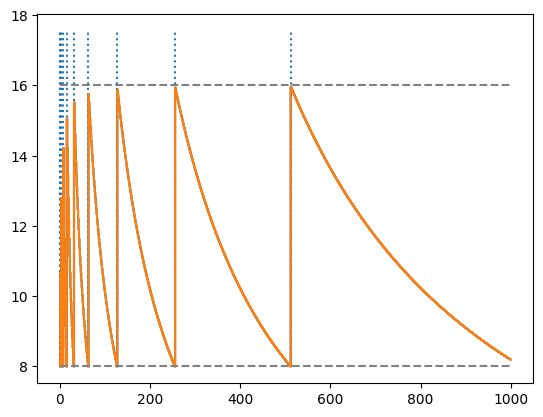

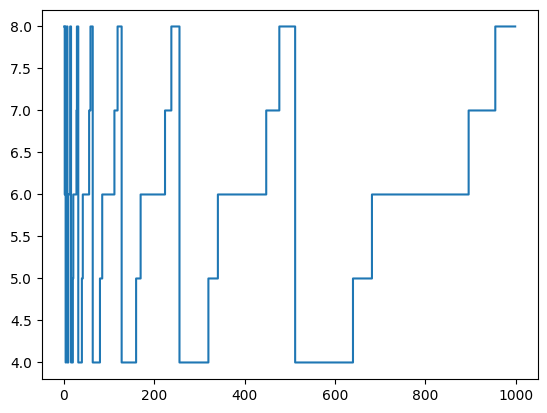

In [28]:
round_to = 3

if True:
    # Full n-bits range
    n_bits = 6
    min_value, max_value = -2**(n_bits-1), 2**(n_bits-1)-1
    assert n_bits == Integer.that_can_represent([min_value, max_value]).bit_width
else:
    # Manual range, not taking the full n-bits into account
    min_value, max_value = -20, 80
    n_bits = Integer.that_can_represent([min_value, max_value]).bit_width

sub_div_limit = 2 **(n_bits - round_to)
print(sub_div_limit)

x = np.arange(min_value, max_value)
subset_size = []
step_size = []
a_max = 1_000

for a in range(1, a_max):
    x_a = x*a
    x_a_acc_size = Integer.that_can_represent(x_a).bit_width
    lsbs = x_a_acc_size - round_to
    x_a_round = round_bit_pattern(x_a, lsbs).astype(np.float64) / a
    
    diff = np.diff(x_a_round)
    diff = diff[diff>0]
    assert np.isclose(diff, diff.max()).all(), diff
    step_size.append(diff.max())
    subset_size.append(len(diff)) 

    # fig, ax = plt.subplots()
    # ax.vlines(x_a_round, -1, 1, )
    # ax.set_xlim(min_value, max_value)
    # plt.show(fig)
    # plt.close(fig)

plt.step(list(range(1, a_max)), step_size)

for i in range(int(np.ceil(np.log2(a_max)))):
    plt.vlines(2**i, min(step_size), max(step_size)*1.1, linestyle="dotted")
    
plt.step(list(range(1, a_max)), step_size)
# These bounds are only true if scaled to [-2**(n-1)+1, 2**(n-1)-1]
plt.hlines(sub_div_limit, 1, a_max, linestyle="dashed", color="grey")
plt.hlines(2*sub_div_limit, 1, a_max, linestyle="dashed", color="grey")
plt.show() 
plt.close()

plt.step(list(range(1, a_max)), subset_size)

In [ ]:
(x_rounded==0).sum(), (y_rounded==0).sum()

In [ ]:
# Snippet to dump all variables
# import shelve
# import sys
# from dill import Pickler, Unpickler
# shelve.Pickler = Pickler
# shelve.Unpickler = Unpickler

# filename='/tmp/shelve.out'
# my_shelf = shelve.open(filename,'n') # 'n' for new
# for key in dir():
#     try:
#         if key in globals():
#             my_shelf[key] = globals()[key]
#         if key in locals():
#             my_shelf[key] = locals()[key]
#     except Exception:
#         print('ERROR shelving: {0}'.format(key))
# my_shelf.close()
# sys.exit(0)

In [ ]:
rounding_threshold = 3

In [ ]:
import numpy as np
from concrete.fhe.dtypes import Integer
from concrete.fhe import round_bit_pattern
from concrete.ml.common.preprocessors import vectorized_graph_eval

best_a = np.ones_like(subgraph_inputs)
best_b = np.zeros_like(subgraph_inputs)
x = (subgraph_inputs + best_b) * best_a
accumulator_bit_width = Integer.that_can_represent(x).bit_width
lsbs_to_remove = (
    accumulator_bit_width - rounding_threshold
)
if lsbs_to_remove > 0:
    x = round_bit_pattern(x, lsbs_to_remove=lsbs_to_remove)
    
assert isinstance(x, np.ndarray)
print("acc-size after rounding", Integer.that_can_represent(x).bit_width)

x = (x.astype(np.float64) / best_a.astype(np.float64)) - best_b.astype(np.float64)
approximated_no_calib = vectorized_graph_eval(
    tlu_subgraph,
    x,
)

In [ ]:
best_a = np.ones_like(subgraph_inputs)
best_b = np.zeros_like(subgraph_inputs)+100
x = (subgraph_inputs + best_b) * best_a
accumulator_bit_width = Integer.that_can_represent(x).bit_width
lsbs_to_remove = (
    accumulator_bit_width - rounding_threshold
)
if lsbs_to_remove > 0:
    x = round_bit_pattern(x, lsbs_to_remove=lsbs_to_remove)
    
assert isinstance(x, np.ndarray)
print("acc-size after rounding", Integer.that_can_represent(x).bit_width)
x = (x.astype(np.float64) / best_a.astype(np.float64)) - best_b.astype(np.float64)
approximated_calib = vectorized_graph_eval(
    tlu_subgraph,
    x,
)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X=subgraph_inputs[:, 0:1], y=reference[:, 0])

In [ ]:
model.coef_, model.intercept_

In [ ]:
# This last TLU probably needs a lot of bit-width, decreasing the bit-width of it fucks us up
# We probably shouldn't try to optimize this last one
# We could maybe have something that does a {tlu-output-bit-width -> rounding-n-bit}

In [ ]:
import matplotlib.pyplot as plt
plt.step(subgraph_inputs[:, 0], reference[:, 0])
plt.step(subgraph_inputs[:, 0], approximated_no_calib[:, 0])
plt.step(subgraph_inputs[:, 0], approximated_calib[:, 0])

In [ ]:
# This TLU is really weird to me
# We should probably detect if a TLU only applies a linear transformation on the bounds
print(tlu_subgraph.format())

In [ ]:
list(locals().keys())